# **Task 3 :To Explore Unsupervised Machine Learning from Scratch**

# **`Comparing KNN vs Kmeans++`**

---



### Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot') 
import math


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importing Iris data set

In [3]:
df = pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [90]:
#Let's gather some information from data
print("Shape of Data")
print(str(list(df.shape)[0])+' rows and '+str(list(df.shape)[1])+' columns')

print('-'*90)
print('-'*90)
print()

print('Data Info')
print(df.info())

print('-'*90)
print('-'*90)
print()

print('Describe Data')
print(df.describe())

print('-'*90)
print('-'*90)
print()

print('Unique target Values')
print(df.Species.unique())

Shape of Data
150 rows and 7 columns
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
 6   Target         150 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB
None
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------

Describe Data
      

### Setting Target for 'Iris-setosa' , 'Iris-versicolor' and 'Iris-virginica'



In [5]:
item = {
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2,
}
df['Target'] = [item[i] for i in df.Species]
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [75]:
df.Target.unique()

array([0, 1, 2])

### Some Visualization to better understanding the data 

In [91]:
X = df.iloc[:,[1,2,3]].values
y = df.iloc[:,-1].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

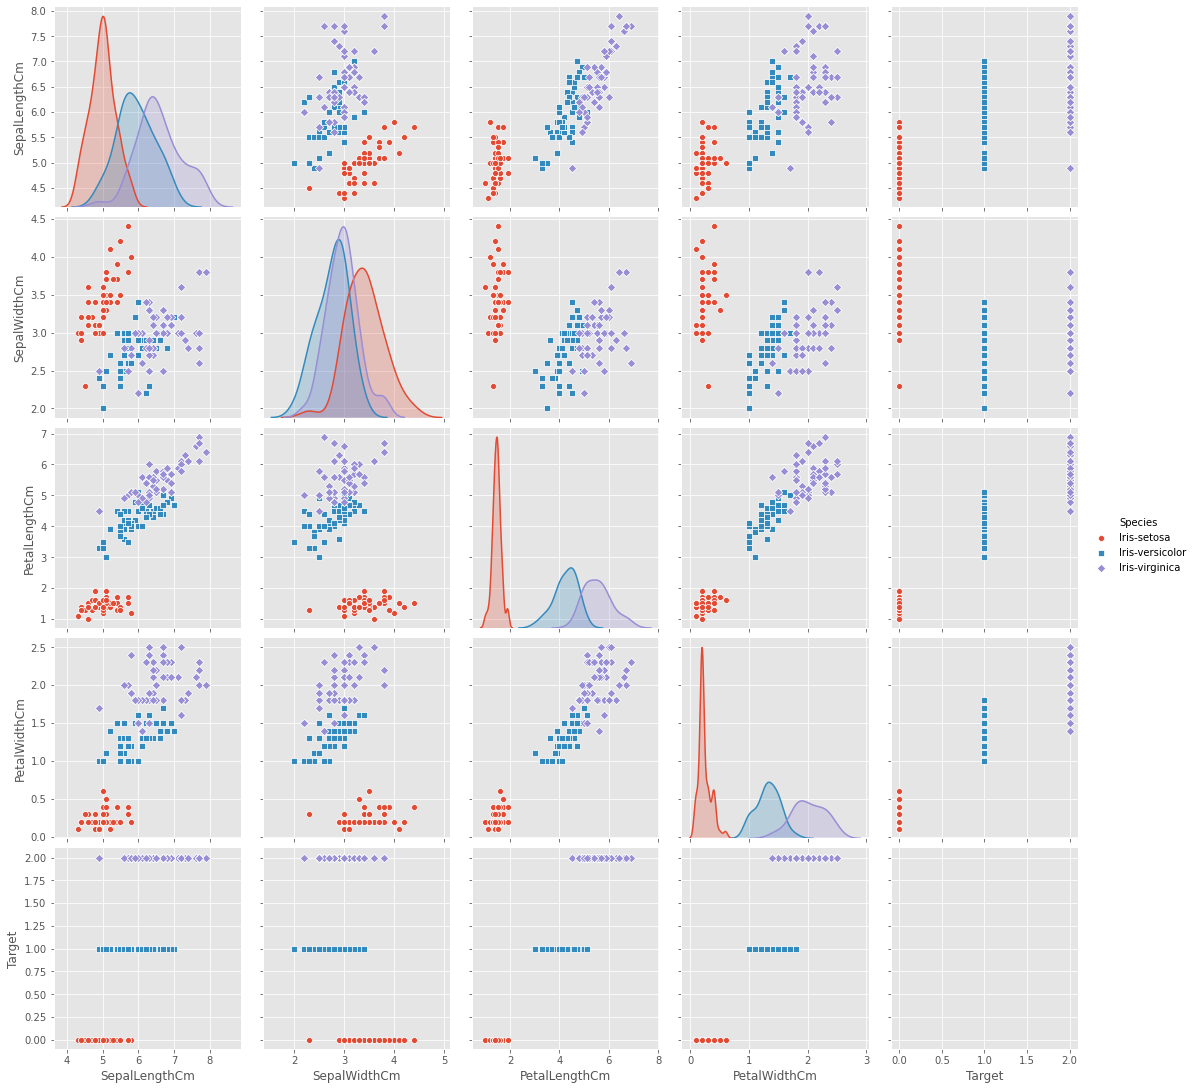

In [77]:
plt.figure()
sns.pairplot(df.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()


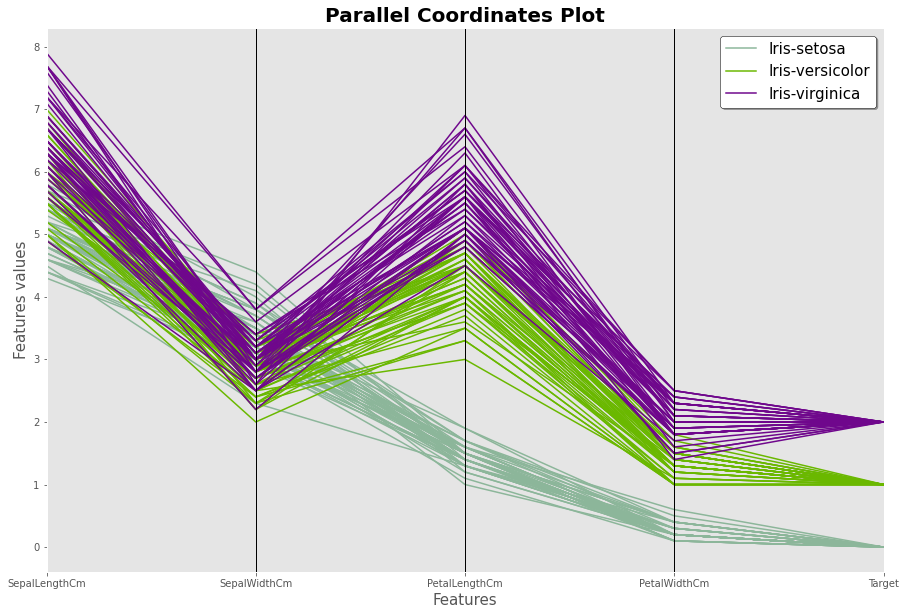

In [9]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(df.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

### Train_Test_split

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# **K Nearest Neighbours**

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 4
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train,y_train)
pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, pred_y))

Accuracy of model at K=4 is 0.9666666666666667


### Increasing accuracy by finding Highest accuracy points

Text(0, 0.5, 'accuracy rate')

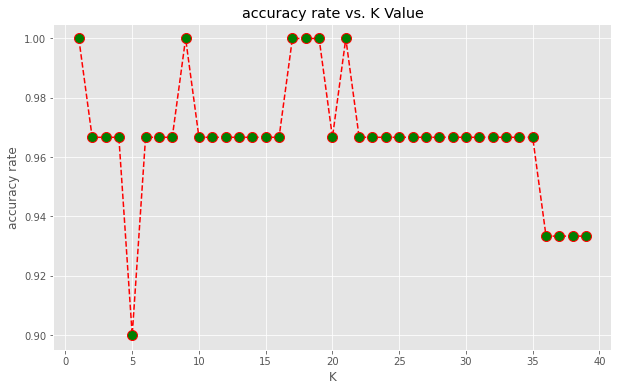

In [85]:
accuracy_rate = []

for j in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=j)
    knn.fit(X_train,y_train)
    pred_j = knn.predict(X_test)
    accuracy_rate.append(metrics.accuracy_score(y_test, pred_j))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='red', linestyle='dashed', 
         marker='o',markerfacecolor='green', markersize=10)
plt.title('accuracy rate vs. K Value')
plt.xlabel('K')
plt.ylabel('accuracy rate')


Now , we know points where we get highest accuracy and for now lets just fix to 9

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


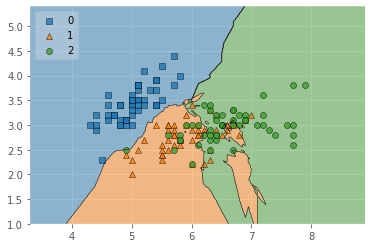

In [83]:
from mlxtend.plotting import plot_decision_regions
def knn_comparison(data, k):
    x = data.iloc[:,[1,2]].values
    y = data['Target'].astype(int).values
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)
# Plotting decision region

    plot_decision_regions(x, y, clf=clf, legend=2)
knn_comparison(df,9)

# **Kmeans++**


### Lets find Optimum number of cluster for Kmean++ using Elbow Method :)

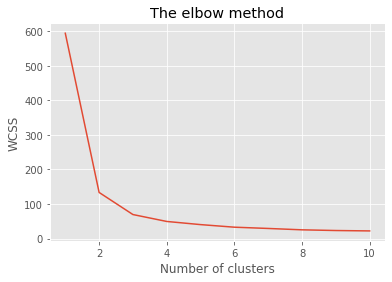

In [63]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

The optimum number of clusters is where the elbow occurs.Hence , in this case optimum numbers of clusters are 3.

### Now let us apply Kmeans++ as we found optimum clusters


In [73]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

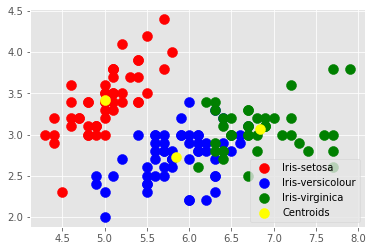

In [74]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()